In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('Data/Images/test 1.jpg')

In [3]:
lanes = np.copy(image)
gray_lanes = cv2.cvtColor(lanes, cv2.COLOR_RGB2GRAY)

In [4]:
print(gray_lanes)

[[233 238 207 ...  40  42  53]
 [238 193 160 ... 112  82  38]
 [204 159 157 ... 150 143 104]
 ...
 [132 121 101 ...  80  80  94]
 [155 122 107 ...  88  90  92]
 [180 126 117 ...  78  76  54]]


In [5]:
blured_gray = cv2.GaussianBlur(gray_lanes, (5,5), 0)

In [6]:
print(blured_gray)

[[212 203 184 ...  87  74  68]
 [202 194 177 ... 103  90  84]
 [183 177 165 ... 131 121 116]
 ...
 [125 119 110 ...  84  85  86]
 [132 125 113 ...  83  83  83]
 [136 128 115 ...  82  82  81]]


In [7]:
canny_lanes = cv2.Canny(blured_gray, 50, 150)
cv2.imshow('res1', canny_lanes)
cv2.waitKey(0)

13

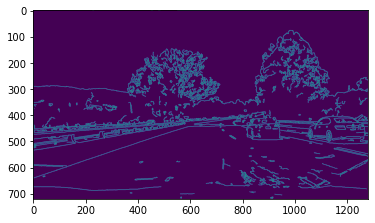

In [8]:
plt.imshow(canny_lanes)

In [9]:
polygons = np.array([
    [(180, 665), (1200, 665) , (650, 420)]
])
mask = np.zeros_like(canny_lanes)
cv2.fillPoly(mask, polygons, 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
masked_lanes = cv2.bitwise_and(canny_lanes, mask)

In [11]:
cv2.imshow('res1', masked_lanes)
cv2.waitKey(0)

13

In [12]:
lane_lines = cv2.HoughLinesP(masked_lanes, 2, np.pi/180, 100, np.array([]), minLineLength=5)

In [19]:
def display(image, lines):
    lines_image = np.zeros_like(image)
    if lane_lines is not None:
        for x1, y1, x2, y2 in lines:
            cv2.line(lines_image, (x1,y1), (x2,y2), (255,0,0), 10)
    return lines_image

In [14]:
def make_coordinates(image, line_params):
    slope, intercept = line_params
    y1 = int(665)
    y2 = int(480)
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1, y1, x2, y2])

In [15]:
def averaged_lines(image, lines):
    left_fit = []
    right_fit = [(0.67,0)]
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            parameters = np.polyfit((x1, x2), (y1, y2), 1)
            slope = parameters[0]
            intercept = parameters[1]
            if slope < 0:
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

In [20]:
averaged_line = averaged_lines(lanes, lane_lines)
print(averaged_line)
new_img = display(lanes, averaged_line)

[[-1830594197425205               665 19335651210312000               480]
 [             1310               665             -2279               480]]


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type


In [17]:
cv2.imshow('res1', new_img)
cv2.waitKey(0)

NameError: name 'new_img' is not defined

In [21]:
final_image2 = cv2.addWeighted(new_img, 0.8, image, 1, 1)
cv2.imshow('res1', final_image2)
cv2.waitKey(0)

NameError: name 'new_img' is not defined

In [23]:
cap = cv2.VideoCapture("Data/Main Video.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    blured_frame = cv2.GaussianBlur(gray_frame, (5,5), 0)
    canny_frame = cv2.Canny(blured_frame, 50, 150)
    polygons = np.array([
    [(180, 665), (1200, 665) , (650, 420)]
    ])
    mask_2 = np.zeros_like(canny_frame)
    cv2.fillPoly(mask_2, polygons, 255)
    masked_frames = cv2.bitwise_and(canny_frame, mask_2)
    lane_lines_frames = cv2.HoughLinesP(masked_frames, 2, np.pi/180, 100, np.array([]), minLineLength=15)
    averaged_Fline = averaged_lines(frame, lane_lines_frames)
    new_frame_img = display(frame, averaged_Fline)
    final_frames = cv2.addWeighted(new_frame_img, 0.8, frame, 1, 1)
    cv2.imshow('res1', final_frames)
    cv2.waitKey(1)


C:\Users\ahmed\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ahmed\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: cannot unpack non-iterable numpy.float64 object